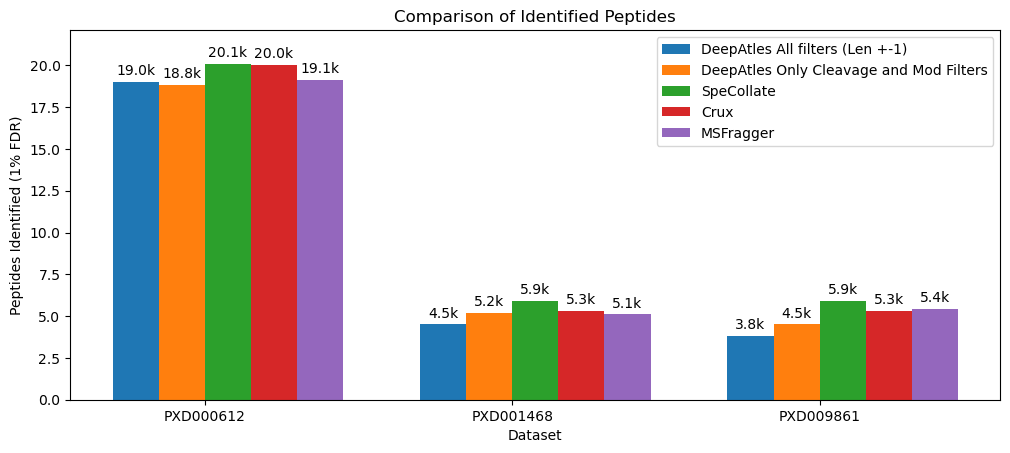

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['PXD000612', 'PXD001468', 'PXD009861']
len_filter = [11.7, 2.2, 2.7]
len_pm_one = [19, 4.5, 3.8]
no_len_filter = [18.8, 5.2, 4.5]
specollate = [20.1, 5.9, 5.9]
crux = [20, 5.3, 5.3]
msfragger = [19.1, 5.1, 5.4]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
fig.set_figwidth(12)
# rects1 = ax.bar(x - 2.5 * width, len_filter, width, label='DeepAtles (All Filters)')
rects2 = ax.bar(x - 1.5 * width, len_pm_one, width, label='DeepAtles All filters (Len +-1)')
rects3 = ax.bar(x - 0.5 * width, no_len_filter, width, label='DeepAtles Only Cleavage and Mod Filters')
rects4 = ax.bar(x + 0.5 * width, specollate, width, label='SpeCollate')
rects5 = ax.bar(x + 1.5 * width, crux, width, label='Crux')
rects6 = ax.bar(x + 2.5 * width, msfragger, width, label='MSFragger')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Peptides Identified (1% FDR)')
ax.set_xlabel('Dataset')
ax.set_title('Comparison of Identified Peptides')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.margins(0.05, 0.1)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}k'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

# fig.tight_layout()
plt.savefig('Open-Peptides.png', dpi=600)
plt.show()

/tmp/ipykernel_2532240/174311064.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([human_format(tick) for tick in ticks])


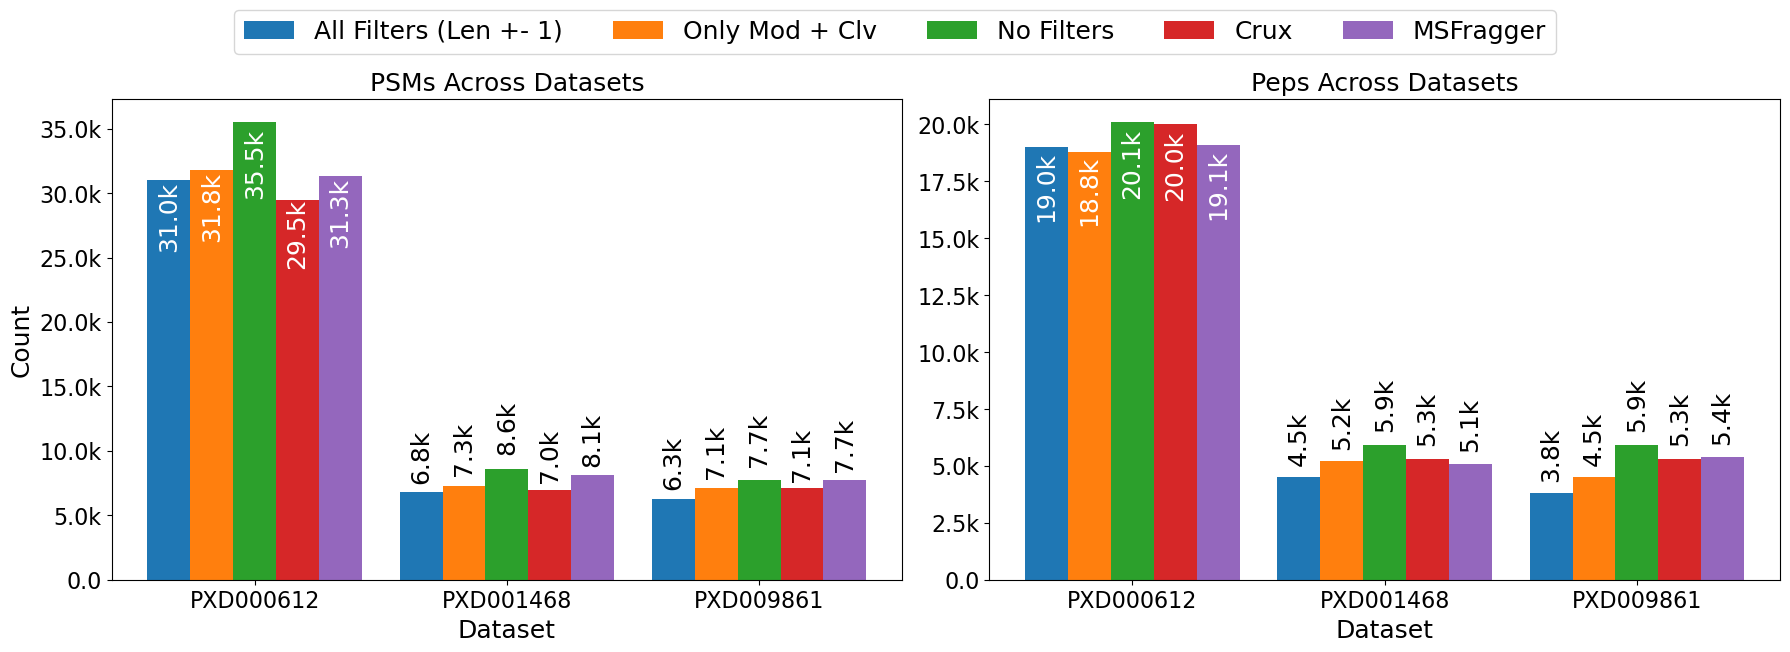

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for PSMs
datasets_PSMs = ['PXD000612', 'PXD001468', 'PXD009861']
all_filters_len_PSMs = [31.0, 6.8, 6.3]
only_mod_clv_PSMs = [31.8, 7.3, 7.1]
no_filters_PSMs = [35.5, 8.6, 7.7]
crux_PSMs = [29.5, 7.0, 7.1]
msfragger_PSMs = [31.3, 8.1, 7.7]

# Data for Peps
datasets_Peps = ['PXD000612', 'PXD001468', 'PXD009861']
all_filters_len_Peps = [19, 4.5, 3.8]
only_mod_clv_Peps = [18.8, 5.2, 4.5]
no_filters_Peps = [20.1, 5.9, 5.9]
crux_Peps = [20, 5.3, 5.3]
msfragger_Peps = [19.1, 5.1, 5.4]

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return f"{round(num, 1)}{'k' * magnitude}"
    

def plot_bar(ax, datasets, all_filters_len, only_mod_clv, no_filters, crux, msfragger, title):

    # Multiply data by 1000 for accurate representation
    all_filters_len = [x * 1000 for x in all_filters_len]
    only_mod_clv = [x * 1000 for x in only_mod_clv]
    no_filters = [x * 1000 for x in no_filters]
    crux = [x * 1000 for x in crux]
    msfragger = [x * 1000 for x in msfragger]

    bar_width = 0.17
    index = np.arange(len(datasets))
    
    def autolabel(rects):
        max_height = max([rect.get_height() for rect in rects])
        threshold = 0.8 * max_height  # 80% of the max height
        
        for rect in rects:
            height = rect.get_height()
            if height > threshold:
                color = 'white'
                vertical_position = height - (0.09 * max_height)  # 5% down from the top of the bar
            else:
                color = 'black'
                vertical_position = height + (0.09 * max_height)  # 1% above the top of the bar
                
            ax.annotate(
                human_format(height),
                xy=(rect.get_x() + rect.get_width() / 2, vertical_position),
                xytext=(0, 0),
                textcoords="offset points",
                ha='center', va='center',
                rotation=90,  # Rotate the text
                fontsize=18,  # Font size
                color=color   # Set color
            )

    rects2 = ax.bar(index, all_filters_len, bar_width, label='All Filters (Len +- 1)')
    rects3 = ax.bar(index + bar_width, only_mod_clv, bar_width, label='Only Mod + Clv')
    rects4 = ax.bar(index + bar_width * 2, no_filters, bar_width, label='No Filters')
    rects5 = ax.bar(index + bar_width * 3, crux, bar_width, label='Crux')
    rects6 = ax.bar(index + bar_width * 4, msfragger, bar_width, label='MSFragger')
    
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)
    autolabel(rects6)
    
    ax.set_xlabel('Dataset', fontsize=18)  # Increase the font size
    if ax == axes[0]:
        ax.set_ylabel('Count', fontsize=18)  # Increase the font size
    ax.set_title(title, fontsize=18)  # Increase the font size
    ax.set_xticks(index + bar_width * 2)
    ax.set_xticklabels(datasets, fontsize=16)  # Increase the font size
    ax.tick_params(axis='y', labelsize=16)  # Increase the font size

# Adjust y-axis ticks and labels
def set_yticks(ax):
    ticks = ax.get_yticks()
    ax.set_yticklabels([human_format(tick) for tick in ticks])

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

plot_bar(axes[0], datasets_PSMs, all_filters_len_PSMs, only_mod_clv_PSMs, no_filters_PSMs, crux_PSMs, msfragger_PSMs, 'PSMs Across Datasets')
plot_bar(axes[1], datasets_Peps, all_filters_len_Peps, only_mod_clv_Peps, no_filters_Peps, crux_Peps, msfragger_Peps, 'Peps Across Datasets')

set_yticks(axes[0])
set_yticks(axes[1])

# Unified legend using one set of handles and labels from either axes
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=5, fontsize=18)

plt.tight_layout()
plt.show()

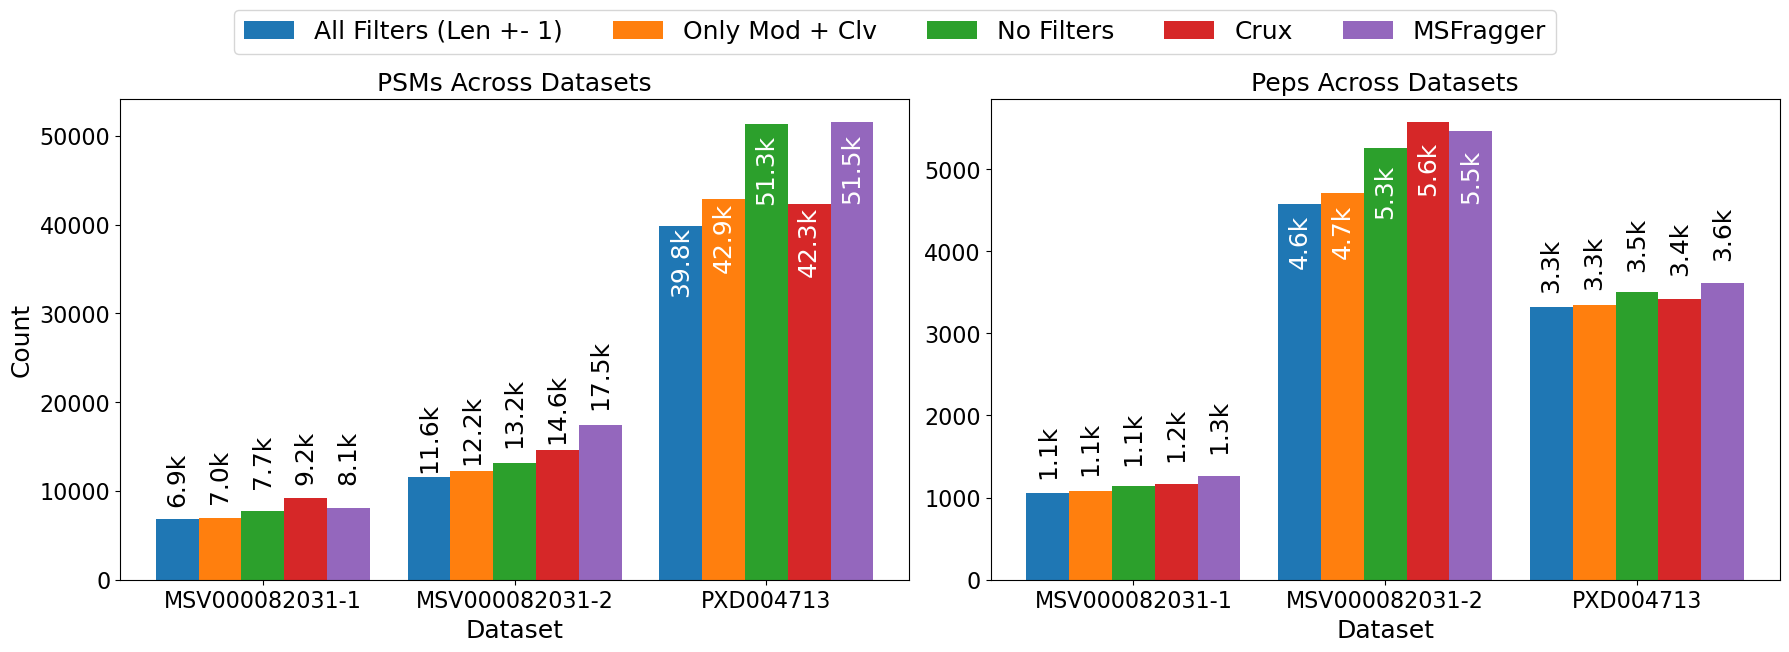

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for PSMs
datasets_PSMs = ['MSV000082031-1', 'MSV000082031-2', 'PXD004713']
all_filters_len_PSMs = [6875, 11624, 39797]
only_mod_clv_PSMs = [6959, 12244, 42882]
no_filters_PSMs = [7725, 13191, 51303]
crux_PSMs = [9167, 14596, 42349]
msfragger_PSMs = [8080, 17470, 51528]

# Data for Peps
datasets_Peps = ['MSV000082031-1', 'MSV000082031-2', 'PXD004713']
all_filters_len_Peps = [1059, 4577, 3320]
only_mod_clv_Peps = [1078, 4714, 3341]
no_filters_Peps = [1141, 5253, 3507]
crux_Peps = [1162, 5571, 3422]
msfragger_Peps = [1262, 5460, 3611]

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return f"{round(num, 1)}{'k' * magnitude}"

def plot_bar(ax, datasets, all_filters_len, only_mod_clv, no_filters, crux, msfragger, title):
    bar_width = 0.17
    index = np.arange(len(datasets))
    
    def autolabel(rects):
        max_height = max([rect.get_height() for rect in rects])
        threshold = 0.8 * max_height  # 80% of the max height
        
        for rect in rects:
            height = rect.get_height()
            if height > threshold:
                color = 'white'
                vertical_position = height - (0.10 * max_height)  # 5% down from the top of the bar
            else:
                color = 'black'
                vertical_position = height + (0.11 * max_height)  # 1% above the top of the bar
                
            ax.annotate(
                human_format(height),
                xy=(rect.get_x() + rect.get_width() / 2, vertical_position),
                xytext=(0, 0),
                textcoords="offset points",
                ha='center', va='center',
                rotation=90,  # Rotate the text
                fontsize=18,  # Font size
                color=color   # Set color
            )

    rects2 = ax.bar(index, all_filters_len, bar_width, label='All Filters (Len +- 1)')
    rects3 = ax.bar(index + bar_width, only_mod_clv, bar_width, label='Only Mod + Clv')
    rects4 = ax.bar(index + bar_width * 2, no_filters, bar_width, label='No Filters')
    rects5 = ax.bar(index + bar_width * 3, crux, bar_width, label='Crux')
    rects6 = ax.bar(index + bar_width * 4, msfragger, bar_width, label='MSFragger')
    
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)
    autolabel(rects6)
    
    ax.set_xlabel('Dataset', fontsize=18)  # Increase the font size
    if ax == axes[0]:
        ax.set_ylabel('Count', fontsize=18)  # Increase the font size
    ax.set_title(title, fontsize=18)  # Increase the font size
    ax.set_xticks(index + bar_width * 2)
    ax.set_xticklabels(datasets, fontsize=16)  # Increase the font size
    ax.tick_params(axis='y', labelsize=16)  # Increase the font size

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

plot_bar(axes[0], datasets_PSMs, all_filters_len_PSMs, only_mod_clv_PSMs, no_filters_PSMs, crux_PSMs, msfragger_PSMs, 'PSMs Across Datasets')
plot_bar(axes[1], datasets_Peps, all_filters_len_Peps, only_mod_clv_Peps, no_filters_Peps, crux_Peps, msfragger_Peps, 'Peps Across Datasets')

# Unified legend using one set of handles and labels from either axes
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=5, fontsize=18)

plt.tight_layout()
plt.show()

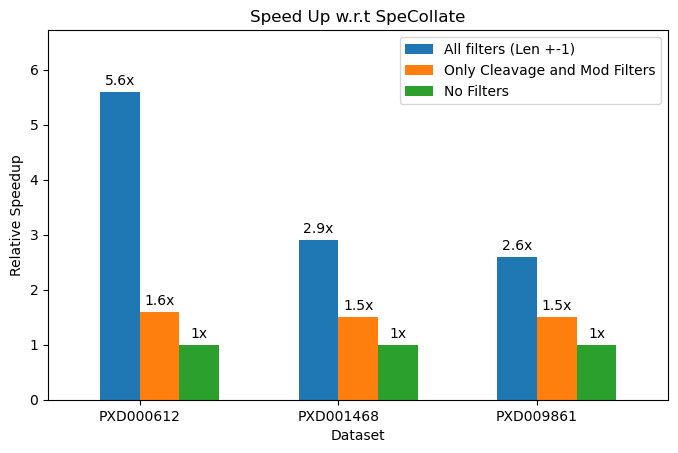

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['PXD000612', 'PXD001468', 'PXD009861']
len_filter = [11.8, 9.2, 8.3]
len_pm_one = [5.6, 2.9, 2.6]
no_len_filter = [1.6, 1.5, 1.5]
specollate = [1, 1, 1]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
fig.set_figwidth(8)
# rects1 = ax.bar(x - 1.5 * width, len_filter, width, label='DeepAtles (All Filters)')
rects2 = ax.bar(x - 0.5 * width, len_pm_one, width, label='All filters (Len +-1)')
rects3 = ax.bar(x + 0.5 * width, no_len_filter, width, label='Only Cleavage and Mod Filters')
rects4 = ax.bar(x + 1.5 * width, specollate, width, label='No Filters')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Speedup')
ax.set_xlabel('Dataset')
ax.set_title('Speed Up w.r.t SpeCollate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.margins(0.1, 0.2)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}x'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# fig.tight_layout()
plt.savefig('Open-Speedup.png', dpi=600)
plt.show()

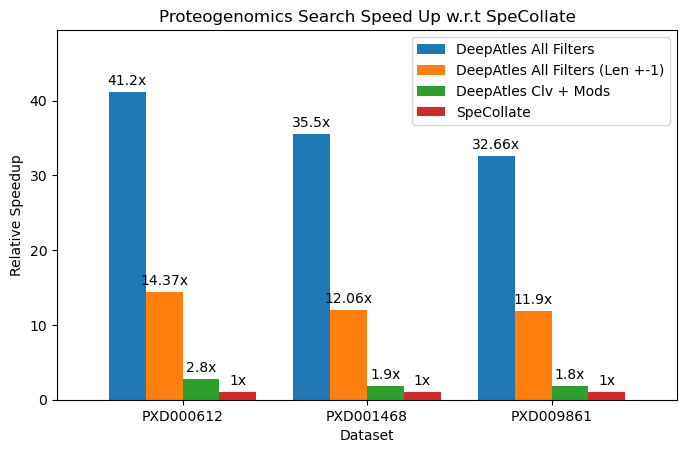

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['PXD000612', 'PXD001468', 'PXD009861']
all_filters = [41.2, 35.5, 32.66]
len_pm_one = [14.37, 12.06, 11.9]
no_len = [2.8, 1.9, 1.8]
specollate = [1, 1, 1]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
fig.set_figwidth(8)
# rects1 = ax.bar(x - 1.5 * width, len_filter, width, label='DeepAtles (All Filters)')
rects1 = ax.bar(x - 1.5 * width, all_filters, width, label='DeepAtles All Filters')
rects2 = ax.bar(x - 0.5 * width, len_pm_one, width, label='DeepAtles All Filters (Len +-1)')
rects3 = ax.bar(x + 0.5 * width, no_len, width, label='DeepAtles Clv + Mods')
rects4 = ax.bar(x + 1.5 * width, specollate, width, label='SpeCollate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Speedup')
ax.set_xlabel('Dataset')
ax.set_title('Proteogenomics Search Speed Up w.r.t SpeCollate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.margins(0.1, 0.2)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}x'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# fig.tight_layout()
plt.savefig('Proteogenomic-Speedup.png', dpi=600)
plt.show()


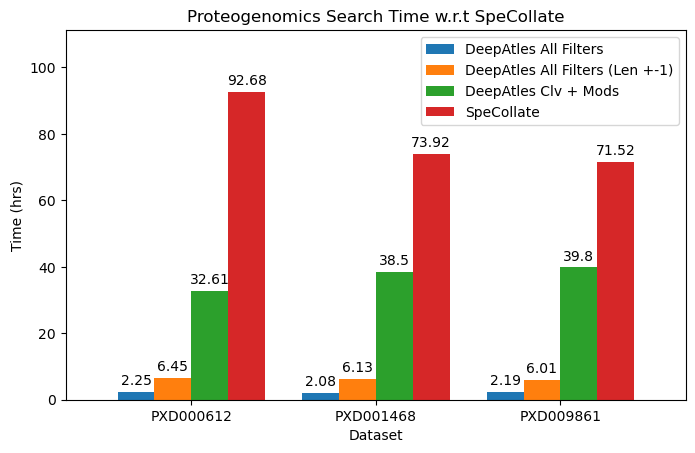

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['PXD000612', 'PXD001468', 'PXD009861']
all_filters = [2.25, 2.08, 2.19]
len_pm_one = [6.45, 6.13, 6.01]
no_len = [32.61, 38.5, 39.8]
specollate = [92.68, 73.92, 71.52]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
fig.set_figwidth(8)
# rects1 = ax.bar(x - 1.5 * width, len_filter, width, label='DeepAtles (All Filters)')
rects1 = ax.bar(x - 1.5 * width, all_filters, width, label='All Filters')
rects2 = ax.bar(x - 0.5 * width, len_pm_one, width, label='All Filters (Len +-1)')
rects3 = ax.bar(x + 0.5 * width, no_len, width, label='Clv + Mods')
rects4 = ax.bar(x + 1.5 * width, specollate, width, label='No Filters')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (hrs)')
ax.set_xlabel('Dataset')
ax.set_title('Proteogenomics Search Time w.r.t SpeCollate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.margins(0.1, 0.2)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# fig.tight_layout()
plt.savefig('Proteogenomic-Time.png', dpi=600)
plt.show()


## Meta Proteomics Exps

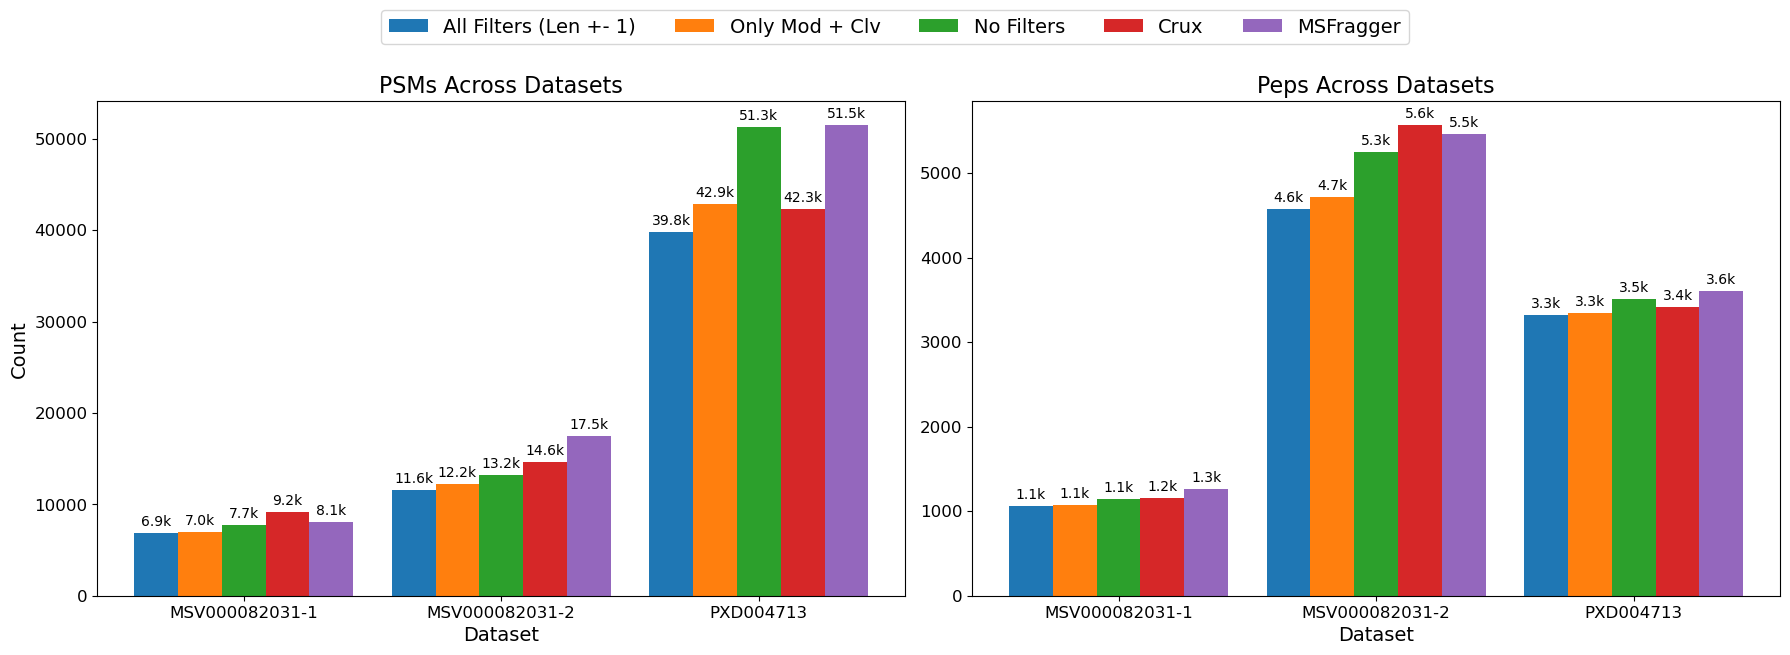

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for PSMs
datasets_PSMs = ['MSV000082031-1', 'MSV000082031-2', 'PXD004713']
all_filters_len_PSMs = [6875, 11624, 39797]
only_mod_clv_PSMs = [6959, 12244, 42882]
no_filters_PSMs = [7725, 13191, 51303]
crux_PSMs = [9167, 14596, 42349]
msfragger_PSMs = [8080, 17470, 51528]

# Data for Peps
datasets_Peps = ['MSV000082031-1', 'MSV000082031-2', 'PXD004713']
all_filters_len_Peps = [1059, 4577, 3320]
only_mod_clv_Peps = [1078, 4714, 3341]
no_filters_Peps = [1141, 5253, 3507]
crux_Peps = [1162, 5571, 3422]
msfragger_Peps = [1262, 5460, 3611]

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return f"{round(num, 1)}{'k' * magnitude}"

def plot_bar(ax, datasets, all_filters_len, only_mod_clv, no_filters, crux, msfragger, title):
    bar_width = 0.17
    index = np.arange(len(datasets))
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(
                human_format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom'
            )

    rects2 = ax.bar(index, all_filters_len, bar_width, label='All Filters (Len +- 1)')
    rects3 = ax.bar(index + bar_width, only_mod_clv, bar_width, label='Only Mod + Clv')
    rects4 = ax.bar(index + bar_width * 2, no_filters, bar_width, label='No Filters')
    rects5 = ax.bar(index + bar_width * 3, crux, bar_width, label='Crux')
    rects6 = ax.bar(index + bar_width * 4, msfragger, bar_width, label='MSFragger')
    
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)
    autolabel(rects6)
    
    ax.set_xlabel('Dataset', fontsize=14)
    if ax == axes[0]:
        ax.set_ylabel('Count', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.set_xticks(index + bar_width * 2)
    ax.set_xticklabels(datasets, fontsize=12)
    ax.tick_params(axis='y', labelsize=12)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

plot_bar(axes[0], datasets_PSMs, all_filters_len_PSMs, only_mod_clv_PSMs, no_filters_PSMs, crux_PSMs, msfragger_PSMs, 'PSMs Across Datasets')
plot_bar(axes[1], datasets_Peps, all_filters_len_Peps, only_mod_clv_Peps, no_filters_Peps, crux_Peps, msfragger_Peps, 'Peps Across Datasets')

# Unified legend using one set of handles and labels from either axes
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=5, fontsize=14)

plt.tight_layout()
plt.show()

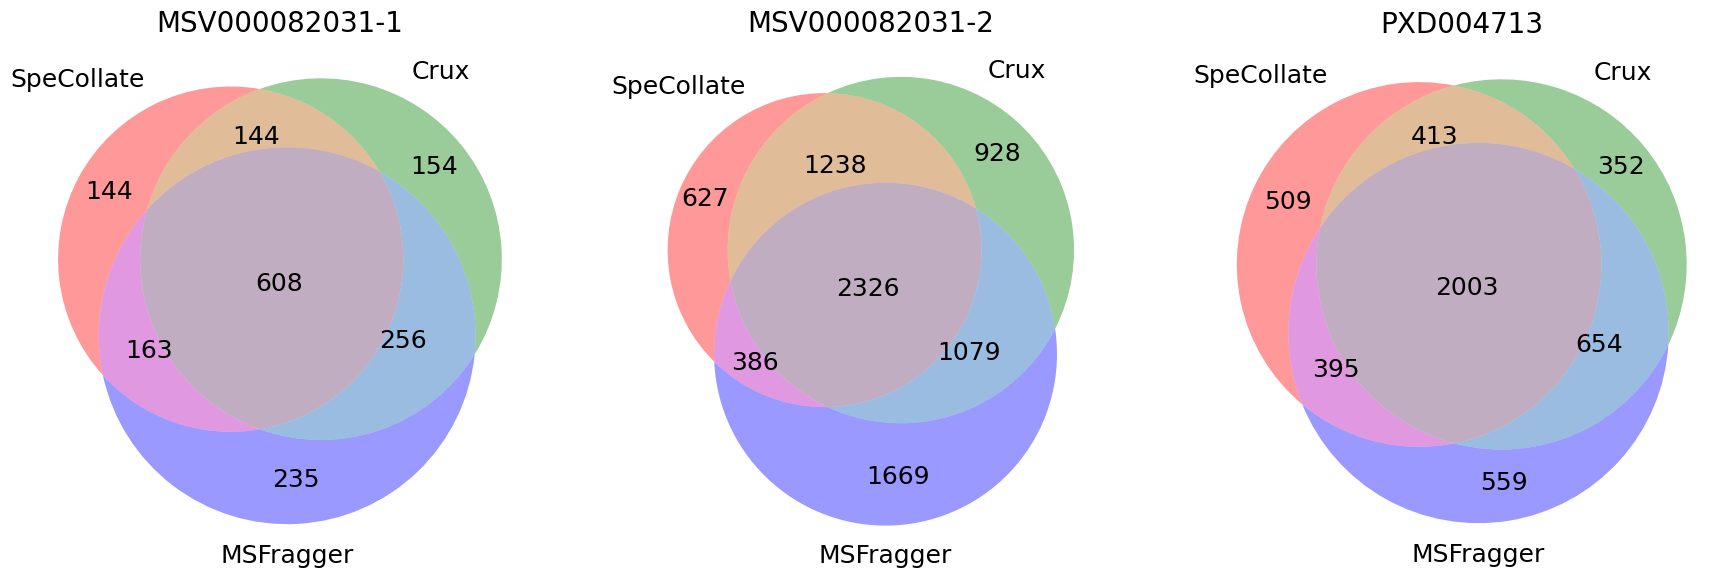

In [1]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Update font sizes for matplotlib
plt.rcParams.update({'font.size': 18})

# Load the Excel file
excel_path = '/lclhome/mtari008/DeepAtles/notebooks/pep-overlaps.xlsx'  # Change this to your actual file path
xls = pd.ExcelFile(excel_path)

# List all sheet names
sheet_names = xls.sheet_names

# Initialize a dictionary to store the dataframes for each sheet
dfs = {}

# Load the data from each sheet into a Pandas DataFrame
for sheet in sheet_names:
    dfs[sheet] = pd.read_excel(excel_path, sheet_name=sheet)

# Create Venn diagrams
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (sheet, ax) in enumerate(zip(sheet_names, axes)):
    df = dfs[sheet]
    
    # Get correct column names
    speCollate_col = 'SpeCollate (Len +-1)'
    crux_col = 'Crux'
    msfragger_col = 'MSFragger'
    
    # Drop any NaNs to only consider non-empty entries
    speCollate_set = set(df[speCollate_col].dropna())
    crux_set = set(df[crux_col].dropna())
    msfragger_set = set(df[msfragger_col].dropna())
    
    # Create Venn diagram
    venn = venn3([speCollate_set, crux_set, msfragger_set], set_labels=('SpeCollate', 'Crux', 'MSFragger'), ax=ax)
    
    # Increase font size of labels in the Venn diagram
    for text in venn.set_labels:
        text.set_fontsize(18)
    for text in venn.subset_labels:
        text.set_fontsize(18)
    
    ax.set_title(sheet, fontsize=20)

plt.tight_layout()
plt.show()
